<a href="https://colab.research.google.com/github/I-Love-yuigahama/Data_wraging/blob/main/Full_code_TDW_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better aesthetics
sns.set_style("whitegrid")

df = pd.read_csv("Camping and Hiking.csv")


In [ ]:
# 🗼 Clean price and ratings columns
def clean_column(col):
    df[col] = df[col].astype(str)
    df[col] = df[col].str.extract(r'(\d+(?:,\d{3})*(?:\.\d{1,2})?)')[0]  # extract numeric part
    df[col] = df[col].str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

for column in ['discount_price', 'actual_price', 'ratings', 'no_of_ratings']:
    if column in df.columns:
        clean_column(column)

In [ ]:
# 🗹 Data Wrangling
print("\nDataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Dataset Shape:
Rows: 792, Columns: 9


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
name                0
main_category       0
sub_category        0
image               0
link                0
ratings           499
no_of_ratings     494
discount_price      0
actual_price        0
dtype: int64


In [ ]:
print("\nSummary Statistics:")
display(df.describe(include='all'))


Summary Statistics:


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,792,792,792,792,792,293.000000,298.000000,690.000000,725.000000
unique,780,1,1,769,792,NaN,NaN,NaN,NaN
top,ONKAR Inc Portable and Lightweight Sleeping Ba...,sports & fitness,Camping & Hiking,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/CHEMAX-Handbag-Storage-H...,NaN,NaN,NaN,NaN
freq,3,792,792,3,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.716382,230.677852,2112.163333,3827.205766
std,NaN,NaN,NaN,NaN,NaN,1.023828,1224.989006,3507.429456,5826.342248
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,105.000000,158.000000
25%,NaN,NaN,NaN,NaN,NaN,3.100000,2.000000,548.925000,999.000000
50%,NaN,NaN,NaN,NaN,NaN,3.900000,4.500000,999.000000,2000.000000
75%,NaN,NaN,NaN,NaN,NaN,4.500000,23.000000,2138.462500,4139.750000


In [ ]:
# Handle Missing Values
missing_cols = df.columns[df.isnull().any()]
for col in missing_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())

# Convert and Filter Numeric Columns
for col in ['discount_price', 'actual_price', 'no_of_ratings']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df = df[df[col].notna() & (df[col] >= 0)]

# Remove Duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
df = df.drop_duplicates()
print("Duplicates removed.\n")

# Categorical Encoding
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col + '_encoded'] = df[col].astype('category').cat.codes
print("Categorical columns encoded for analysis.\n")

Duplicate rows: 0
Duplicates removed.

Categorical columns encoded for analysis.



# Exploratory Data Analysis

          ratings  no_of_ratings  discount_price  actual_price  name_encoded  \
count  792.000000     792.000000      792.000000    792.000000    792.000000   
mean     3.832071      89.602273     1968.801389   3672.631540    388.926768   
std      0.628350     758.588632     3294.679104   5597.301967    225.582465   
min      1.000000       1.000000      105.000000    158.000000      0.000000   
25%      3.900000       4.500000      599.000000   1098.250000    192.750000   
50%      3.900000       4.500000      999.000000   2000.000000    389.500000   
75%      3.900000       4.500000     1973.255000   3999.000000    584.250000   
max      5.000000   16231.000000    40468.460000  67045.000000    779.000000   

       main_category_encoded  sub_category_encoded  image_encoded  \
count                  792.0                 792.0     792.000000   
mean                     0.0                   0.0     381.571970   
std                      0.0                   0.0     222.560425   
min

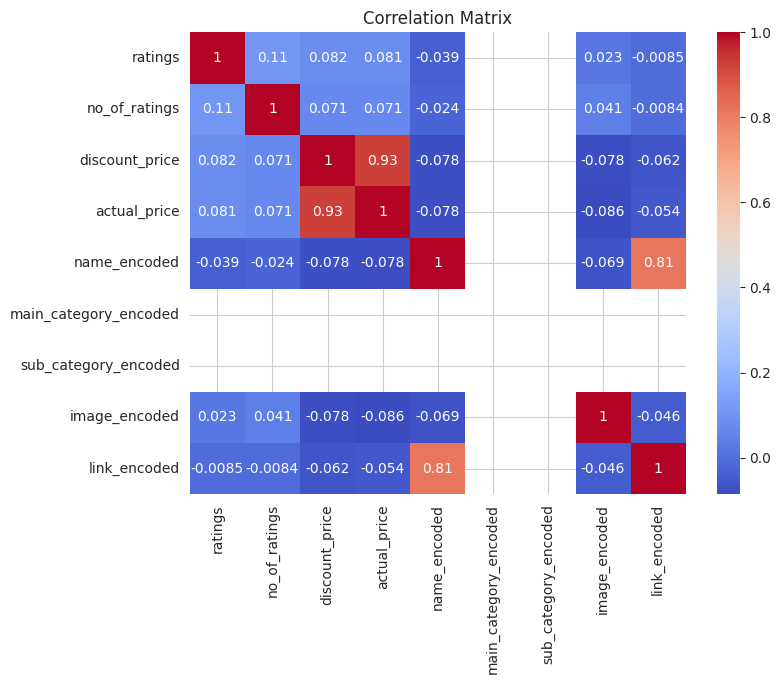

In [ ]:
# 📊 Exploratory Data Analysis
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

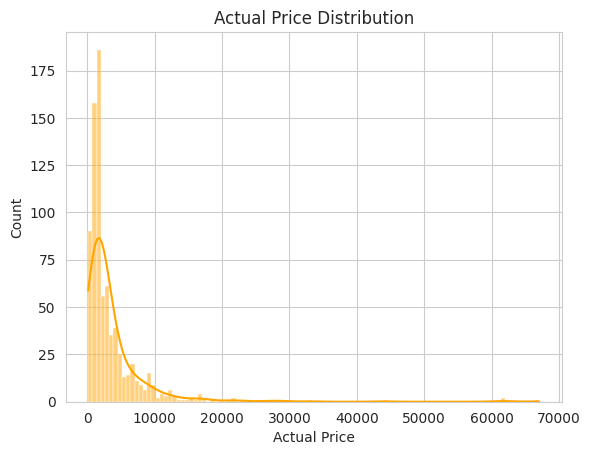

In [ ]:
# Distribution of actual_price
sns.histplot(df['actual_price'], kde=True, color='orange')
plt.title("Actual Price Distribution")
plt.xlabel("Actual Price")
plt.show()

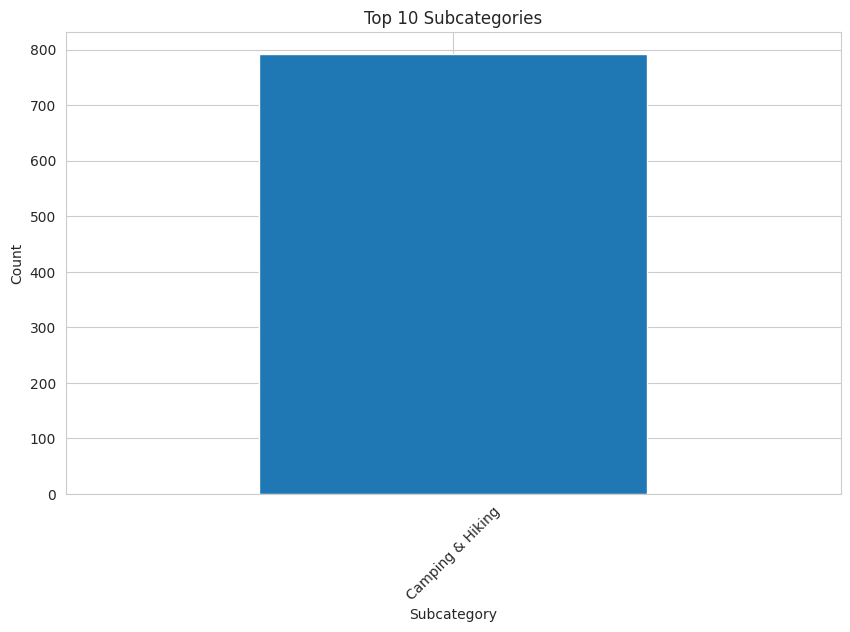

In [ ]:
# Count plot of top subcategories
plt.figure(figsize=(10,6))
df['sub_category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Subcategories")
plt.xlabel("Subcategory")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

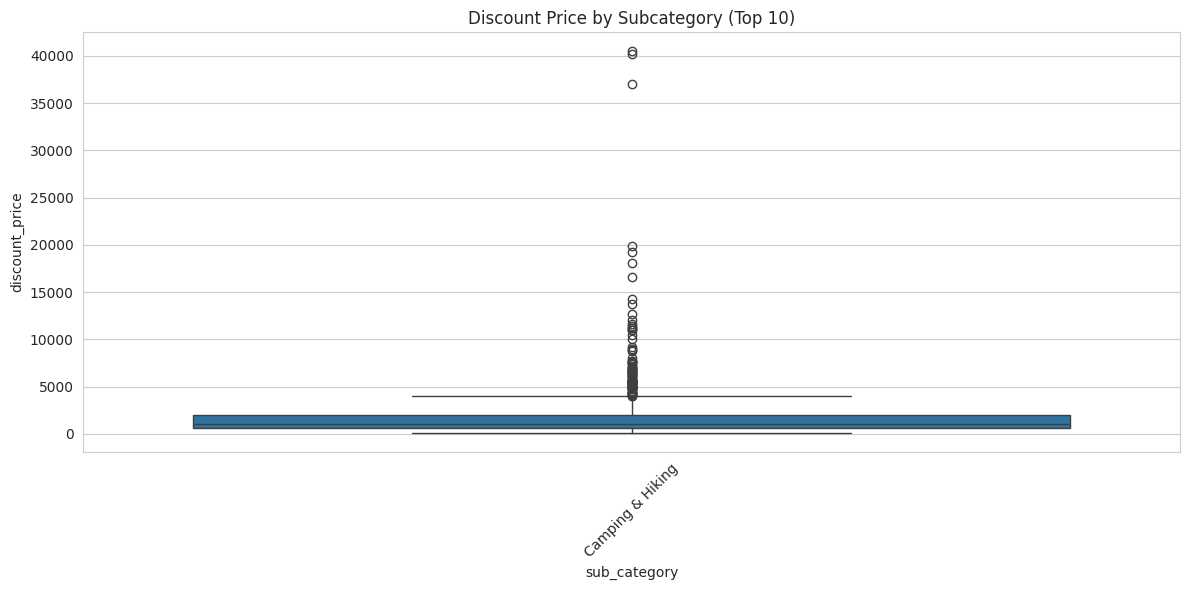

In [ ]:
# Boxplot of discount price by sub_category (top 10 only)
top_subcats = df['sub_category'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['sub_category'].isin(top_subcats)], x='sub_category', y='discount_price')
plt.title("Discount Price by Subcategory (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

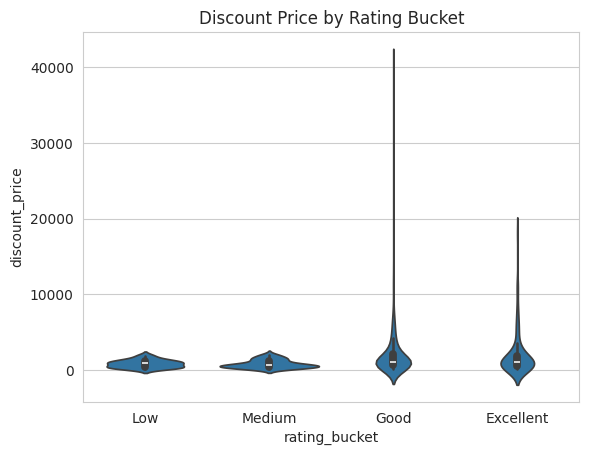

In [ ]:
# Violin plot of discount price by rating bucket
if 'ratings' in df.columns:
    df['rating_bucket'] = pd.cut(df['ratings'], bins=[0,2,3,4,5], labels=['Low','Medium','Good','Excellent'])
    sns.violinplot(x='rating_bucket', y='discount_price', data=df)
    plt.title("Discount Price by Rating Bucket")
    plt.show()


# Data Visualisation

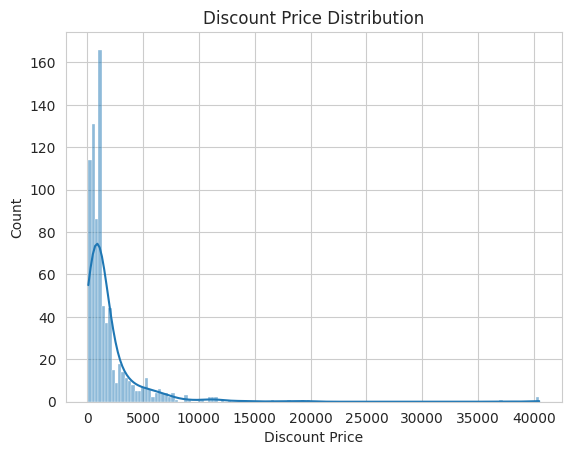

In [ ]:
sns.histplot(df['discount_price'], kde=True)
plt.title("Discount Price Distribution")
plt.xlabel("Discount Price")
plt.show()

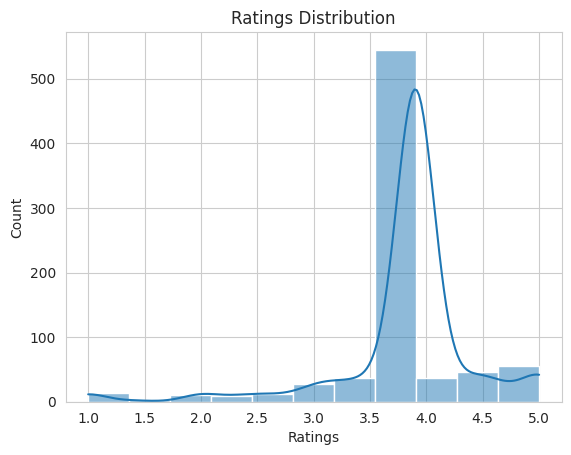

In [ ]:
sns.histplot(df['ratings'], kde=True)
plt.title("Ratings Distribution")
plt.xlabel("Ratings")
plt.show()

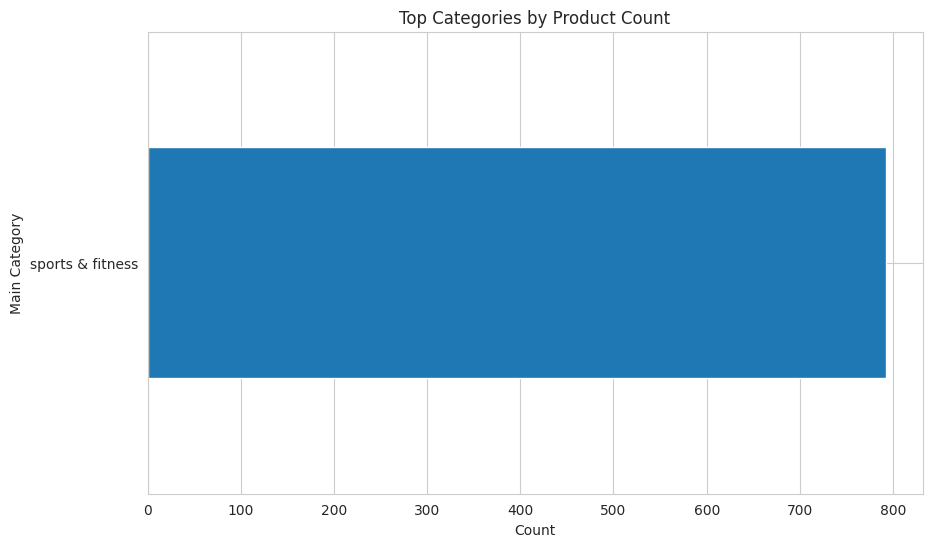

In [ ]:
plt.figure(figsize=(10,6))
df['main_category'].value_counts().head(15).plot(kind='barh')
plt.title("Top Categories by Product Count")
plt.xlabel("Count")
plt.ylabel("Main Category")
plt.show()

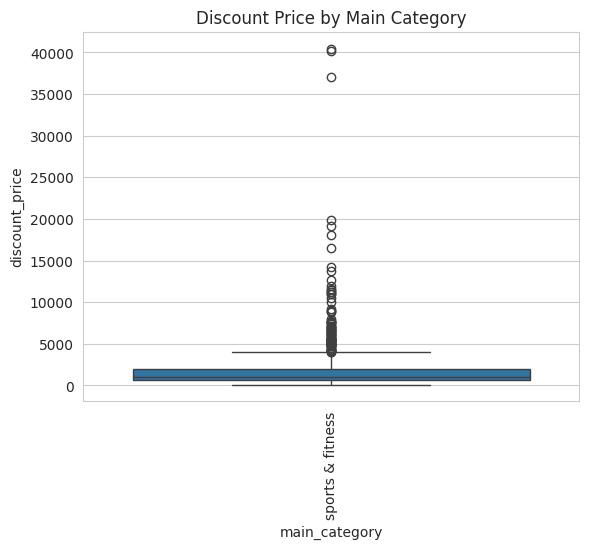

In [ ]:
sns.boxplot(x='main_category', y='discount_price', data=df)
plt.xticks(rotation=90)
plt.title("Discount Price by Main Category")
plt.show()

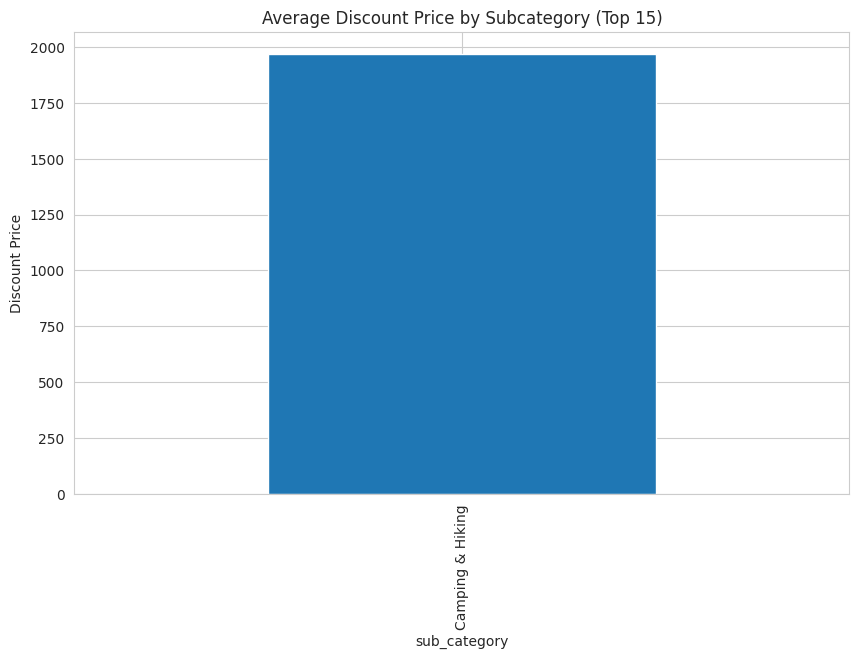

In [ ]:
plt.figure(figsize=(10,6))
df.groupby('sub_category')['discount_price'].mean().sort_values(ascending=False).head(15).plot(kind='bar')
plt.title("Average Discount Price by Subcategory (Top 15)")
plt.ylabel("Discount Price")
plt.xticks(rotation=90)
plt.show()


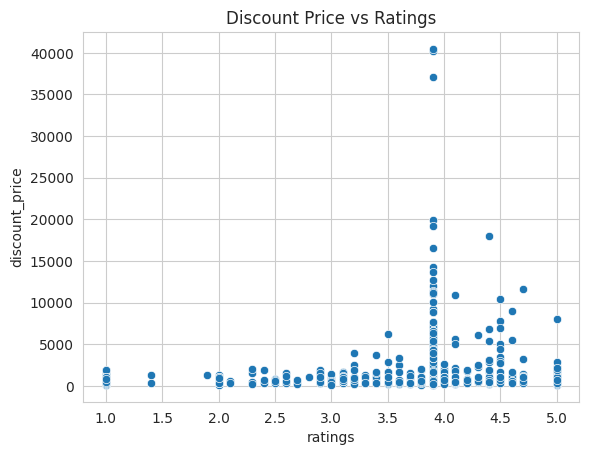

In [ ]:
sns.scatterplot(x='ratings', y='discount_price', data=df)
plt.title("Discount Price vs Ratings")
plt.show()

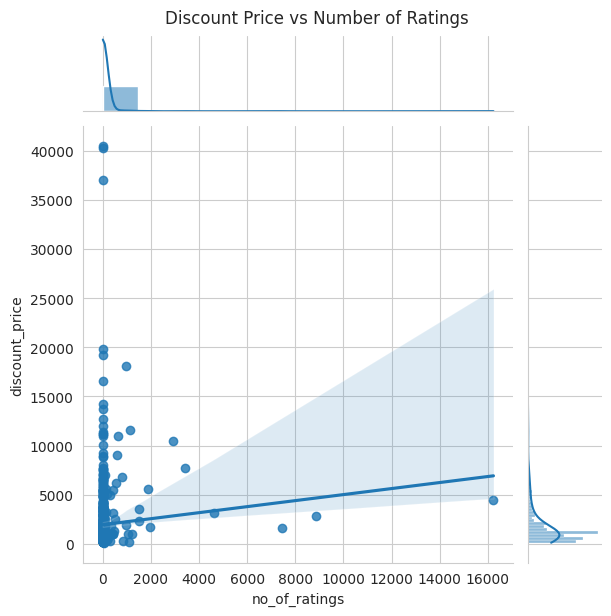

In [ ]:
sns.jointplot(x='no_of_ratings', y='discount_price', data=df, kind='reg')
plt.suptitle("Discount Price vs Number of Ratings", y=1.02)
plt.show()

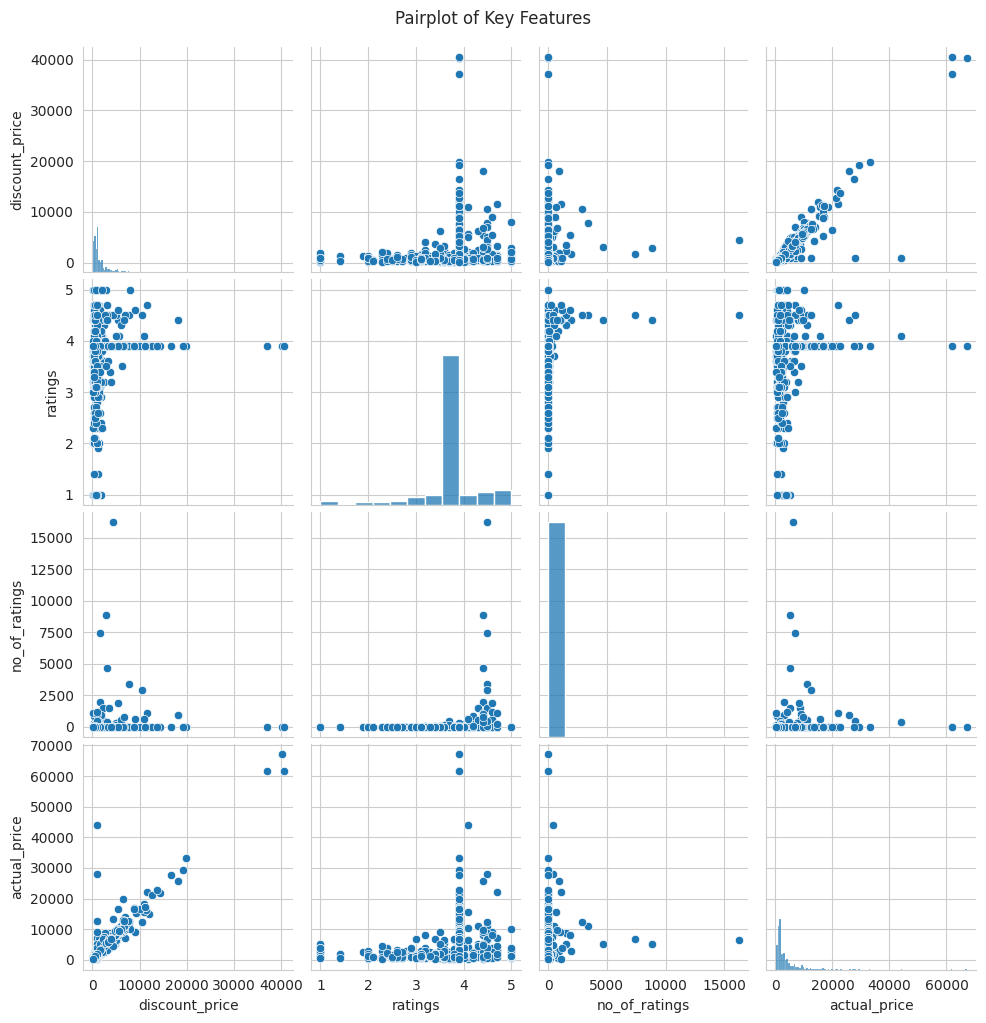

In [ ]:
sns.pairplot(df[['discount_price', 'ratings', 'no_of_ratings', 'actual_price']])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

## Business Insights

RMSE: 422159.47
R² Score: 0.87


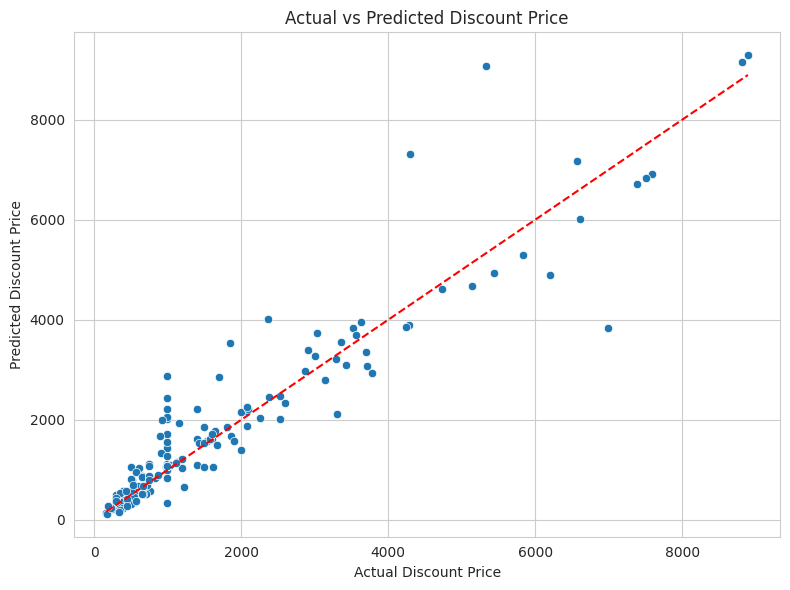

In [ ]:
# Ensure required libraries are imported
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = df[['ratings', 'no_of_ratings', 'actual_price']]
y = df['discount_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 📊 Predicted vs Actual Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Discount Price")
plt.ylabel("Predicted Discount Price")
plt.title("Actual vs Predicted Discount Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()